In [238]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import string

import re
import emoji
import requests
import datetime as dt

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from tqdm.notebook import tqdm

#from transformers import pipeline
#roberta_pipeline = pipeline('sentiment-analysis')

from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer
nav_bayes = NaiveBayesAnalyzer()

In [154]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('movie_reviews')

[nltk_data] Downloading package stopwords to C:\Users\Uche
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Uche
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Uche
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Uche
[nltk_data]     Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [21]:

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data from 2022-15-05 till 2022-21-05 (1 week) and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#Lovedamini since:2022-07-08 until:2022-07-15').get_items()):
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, 
                         tweet.user.location, tweet.lang, tweet.retweetCount, tweet.likeCount])


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%23Lovedamini+since%3A2022-07-08+until%3A2022-07-15&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaCgLCl7b-98yoWgMClwfD_0voqEnEV8IRjFYCJehgHREVGQVVMVDUBFf4PFQAA&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)"))
4 requests to https://api.twitter.com/

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%23Lovedamini+since%3A2022-07-08+until%3A2022-07-15&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaCgLCl7b-98yoWgMClwfD_0voqEnEV8IRjFYCJehgHREVGQVVMVDUBFf4PFQAA&pc=1&spelling_corrections=1&ext=mediaStats%2ChighlightedLabel failed, giving up.

In [22]:
#create a dataset from the scraped data
df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Location', 'Language',
                                               'Retweets', 'Likes'])

In [193]:
df.head()

,Datetime,Tweet Id,Text,Username,Location,Language,Retweets,Likes
0,2022-07-14 23:57:04+00:00,1547731938806378496,"2 tickets for Burna boy ATL July 31st, $90/ ea...",munachiiii,,en,3,2
1,2022-07-14 23:56:18+00:00,1547731747449606147,@triller @burnaboy One &amp; Only African Gian...,Official_umd,,en,0,1
2,2022-07-14 23:55:10+00:00,1547731461683351554,Get Burna Boy to Number 1 now!!! #burnaboy #LO...,Kingezzy_,On God’s Compass,en,0,2
3,2022-07-14 23:53:33+00:00,1547731054437404673,God bless Rema and Burna\nThey saved me this n...,IamWesley17,,en,3,7
4,2022-07-14 23:52:43+00:00,1547730846198558721,BTW I Hope You Don't Give Up \n\n#bumbum #LOVE...,Gerozayn,,en,0,1


In [24]:
df.shape
#they where 18,868 tweets made

(18868, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18868 entries, 0 to 18867
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  18868 non-null  datetime64[ns, UTC]
 1   Tweet Id  18868 non-null  int64              
 2   Text      18868 non-null  object             
 3   Username  18868 non-null  object             
 4   Location  18868 non-null  object             
 5   Language  18868 non-null  object             
 6   Retweets  18868 non-null  int64              
 7   Likes     18868 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 1.2+ MB


In [26]:
#checking the number of language
df['Language'].value_counts()

en     16146
qme     1034
und      544
qht      443
fr       118
in       103
tl        86
es        71
et        66
ht        54
da        25
nl        23
sv        21
pl        20
it        17
pt        15
de        12
ja         9
hi         9
fi         8
cy         8
ro         6
no         5
cs         4
ca         4
tr         4
lt         3
hu         2
eu         1
sl         1
zh         1
ta         1
th         1
vi         1
is         1
lv         1
Name: Language, dtype: int64

In [211]:
#create an hour,minute & second column
df["hour"] =df['Datetime'].dt.hour
df["minute"] =df['Datetime'].dt.minute
df["second"] = df['Datetime'].dt.second


In [212]:
# get month, day, and day of the week from released
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['week_day'] = df['Datetime'].dt.dayofweek
df

,Datetime,Tweet Id,Text,Username,Location,Language,Retweets,Likes,hour,minute,second,month,day,week_day
0,2022-07-14 23:57:04+00:00,1547731938806378496,"2 tickets for Burna boy ATL July 31st, $90/ ea...",munachiiii,,en,3,2,23,57,4,7,14,3
1,2022-07-14 23:56:18+00:00,1547731747449606147,@triller @burnaboy One &amp; Only African Gian...,Official_umd,,en,0,1,23,56,18,7,14,3
2,2022-07-14 23:55:10+00:00,1547731461683351554,Get Burna Boy to Number 1 now!!! #burnaboy #LO...,Kingezzy_,On God’s Compass,en,0,2,23,55,10,7,14,3
3,2022-07-14 23:53:33+00:00,1547731054437404673,God bless Rema and Burna\nThey saved me this n...,IamWesley17,,en,3,7,23,53,33,7,14,3
4,2022-07-14 23:52:43+00:00,1547730846198558721,BTW I Hope You Don't Give Up \n\n#bumbum #LOVE...,Gerozayn,,en,0,1,23,52,43,7,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,2022-07-09 10:20:52+00:00,1545714595582693376,This run🔥🏆\nPS: Messi is Solid \n#LoveDamini h...,nwobodonobert,Nigeria,en,14,29,10,20,52,7,9,5
18864,2022-07-09 10:20:44+00:00,1545714561860386817,I still can’t relate to how people pick their ...,killarboi_,Mars,en,0,0,10,20,44,7,9,5
18865,2022-07-09 10:20:22+00:00,1545714471062192129,Can we talk about common person #lovedamini ht...,ChanelKokolo,Paris,en,0,0,10,20,22,7,9,5
18866,2022-07-09 10:19:54+00:00,1545714353793556482,#LoveDamini is a very good album. Love the vib...,Dami1190,,en,0,0,10,19,54,7,9,5


In [213]:
#Creating a dataframe to store only english tweets
tweets_df = df[df['Language'] == 'en']
tweets_df.reset_index(drop=True, inplace=True)

# Hashtags, Mentioned Users, Characters

In [30]:
#A function to extract hashtags from a tweet
def hashtags(tweet):
    tweet = tweet.lower()
    tweet_regex = re.findall(r'#\w+', tweet)
    return ' '.join(tweet_regex)

In [31]:
#A function to extract mentioned users from a tweet
def mentions(tweet):
    tweet = tweet.lower()
    tweet_regex = re.findall(r'@\w+', tweet)
    return ' '.join(tweet_regex)

In [32]:
#create a dataset with all the songs in the album
burna_songs = ['Glory', 'science', 'Cloak & dagger', 'cloak and dagger', 'kilometre', 'jagele','whiskey', 'last last', 'Different size',
                'its plenty', 'dirty secrets', 'toni-ann singh','solid','for my head','rollercoaster','vanilla','common person', 'wild dreams','how bad could it be','love damini']

#create a dataset with all the artists featured in the album
burna_features = ['j hus', 'jhus', 'victony','popcaan','edsheeran', 'ed sheeran','khalid','blxst','kehlani','j balvin','jbalvin','ladysmith black mambazo']

#create a dataset with all the words associated with burna boy & in the album
common_words = ['burnaboy','burna', 'last last', 'a boat','shy hoe','mad', 'shayo', 'igbo','10/10', 'album', 'lovedamini', 'gun', 
                'another', 'hard','af', 'june', '8th','album','love','damini','fire','congrats','congratulations','african giant', 
               'best album','grammy' ,'chart','odogwu','perform', 'play','playing','stage','perfomance','no cap','too good',"'", '...', '....', 
                '1','#1','history','repeat','blood', 'trash', 'week',
               "''", '..', ',', '’']

In [205]:
#A function to extract series characters from a tweet
def characters(tweet):
    tweet = tweet.lower()
    tweet_tokenize = word_tokenize(tweet)
    xter = [character for character in tweet_tokenize if character in burna_songs]
    return ' '.join(xter)

In [206]:
#A function to extract series characters from a tweet for burna_features
def b_characters(tweet):
    tweet = tweet.lower()
    tweet_tokenize = word_tokenize(tweet)
    xter = [character for character in tweet_tokenize if character in burna_features]
    return ' '.join(xter)

In [191]:
#A function to extract series characters from a tweet for common_words
def c_characters(tweet):
    tweet = tweet.lower()
    tweet_tokenize = word_tokenize(tweet)
    xter = [character for character in tweet_tokenize if character in common_words]
    return ' '.join(xter)

In [215]:
#create new columns with the data extracted with the funtions
tweets_df.loc[:, 'Hashtags'] = tweets_df.loc[:, 'Text'].apply(hashtags)
tweets_df.loc[:, 'MentionedUsers'] = tweets_df.loc[:, 'Text'].apply(mentions)
tweets_df.loc[:, 'Characters'] = tweets_df.loc[:, 'Text'].apply(characters)
tweets_df.loc[:, 'b_Characters'] = tweets_df.loc[:, 'Text'].apply(b_characters)
tweets_df.loc[:, 'c_Characters'] = tweets_df.loc[:, 'Text'].apply(c_characters)


C:\Users\Uche Chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [216]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,Location,Language,Retweets,Likes,hour,minute,second,month,day,week_day,Hashtags,MentionedUsers,Characters,b_Characters,c_Characters
0,2022-07-14 23:57:04+00:00,1547731938806378496,"2 tickets for Burna boy ATL July 31st, $90/ ea...",munachiiii,,en,3,2,23,57,4,7,14,3,#lovedamini,,,,"burna , lovedamini"
1,2022-07-14 23:56:18+00:00,1547731747449606147,@triller @burnaboy One &amp; Only African Gian...,Official_umd,,en,0,1,23,56,18,7,14,3,#lovedamini,@triller @burnaboy,,,burnaboy lovedamini
2,2022-07-14 23:55:10+00:00,1547731461683351554,Get Burna Boy to Number 1 now!!! #burnaboy #LO...,Kingezzy_,On God’s Compass,en,0,2,23,55,10,7,14,3,#burnaboy #lovedamini,,,,burna 1 burnaboy lovedamini
3,2022-07-14 23:53:33+00:00,1547731054437404673,God bless Rema and Burna\nThey saved me this n...,IamWesley17,,en,3,7,23,53,33,7,14,3,#raveandroses #lovedamini,,,,"burna , lovedamini"
4,2022-07-14 23:52:43+00:00,1547730846198558721,BTW I Hope You Don't Give Up \n\n#bumbum #LOVE...,Gerozayn,,en,0,1,23,52,43,7,14,3,#bumbum #lovedamini #kingkohli,,,,lovedamini


In [38]:
#A function used to count hashtags, mentioned users and characters
def count(terms):
    terms = str(terms)
    term_list = tweets_df[terms].tolist()
    tweet_list = []

    for term in term_list:
        items = term.split()
        for item in items:
            tweet_list.append(item)
        
    term_count = Counter(tweet_list)
    term_count_df = pd.DataFrame.from_dict(term_count, orient='index').reset_index()
    term_count_df.columns = [terms, 'Count']
    term_count_df.sort_values('Count', ascending=False, inplace=True)
    term_count_df.reset_index(inplace=True, drop='True')
    
    tweet_string = ' '.join(tweet_list)
    
    #Returns a dataframe (consisting of values and counts) and a string containing the values
    return term_count_df, tweet_string

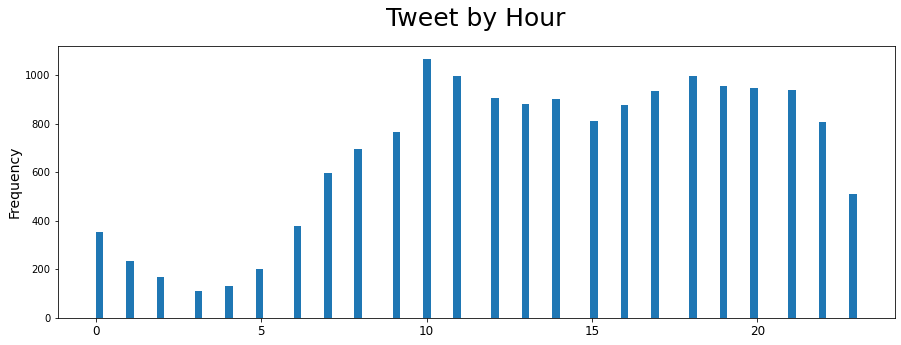

In [210]:
#number of Tweets by Hour
plt.xticks(fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.title("Tweet by Hour", fontsize=25, pad=20)
tweets_df["hour"].plot.hist(figsize=(15,5), bins=100);

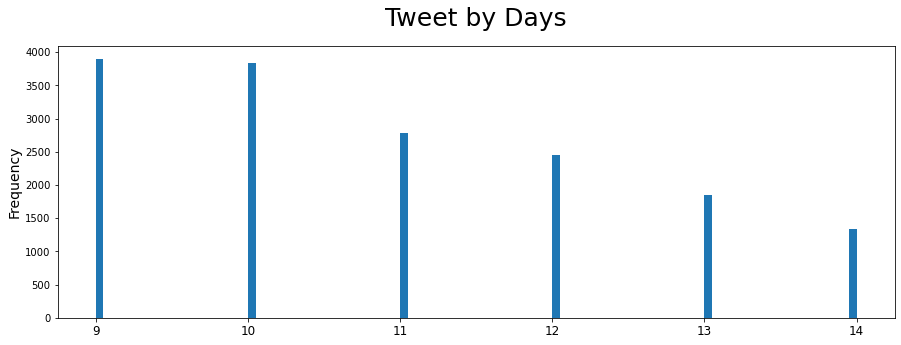

In [323]:
#number of Tweets by Days
plt.xticks(fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.title("Tweet by Days", fontsize=25, pad=20)
tweets_df["day"].plot.hist(figsize=(15,5), bins=100);

# Top Hashtags

In [39]:
hash_count_df, hash_string = count('Hashtags')

In [40]:
hash_count_df.head(10)

,Hashtags,Count
0,#lovedamini,16307
1,#burnaboy,1102
2,#burnaboy𓃵,963
3,#wizkid,170
4,#1,144
5,#obidatti2023,135
6,#commonperson,126
7,#burna,120
8,#loveisland,111
9,#lastlast,100


Text(0.5, 1.0, 'Burna boys HashTags')

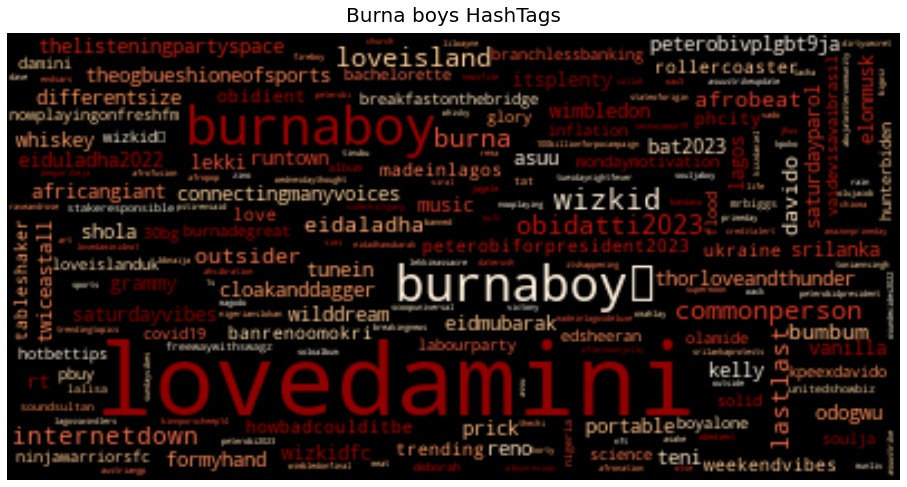

In [41]:
hash_wc = WordCloud(background_color='black', collocations=False)

#Generate the word cloud
hash_wc.generate(hash_string)

#Display the word cloud
fig = plt.figure(figsize=(16, 18))

plt.imshow(hash_wc.recolor(colormap='OrRd', random_state=2), alpha=1, 
           interpolation="bilinear")
plt.axis('off')
plt.title('Burna boys HashTags', fontdict={'fontsize':20}, pad=12)

# Top Mentioned Song

In [42]:
character_count_df, character_string = count('Characters')

Text(0, 1, 'Characters')

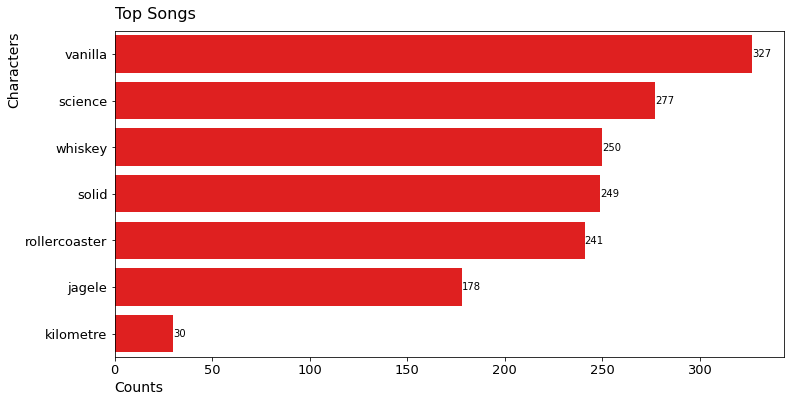

In [51]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Count', y='Characters', data=character_count_df, color = 'red')
    
plt.bar_label(ax.containers[0])
ax.set_title('Top Songs', fontdict={'fontsize':16}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc= 'left')
ax.set_ylabel('Characters', fontdict={'fontsize':14}, loc = 'top')

#As we can see on the chart the most talked about song is 'Vanilla'

# Top Mentioned Feature on the Album

In [326]:
b_character_count_df, b_character_string = count('b_Characters')
b_character_count_df

,b_Characters,Count
0,edsheeran,166
1,victony,103
2,khalid,101
3,popcaan,54
4,jhus,50
5,kehlani,37
6,blxst,33
7,jbalvin,17


Text(0, 1, 'Characters')

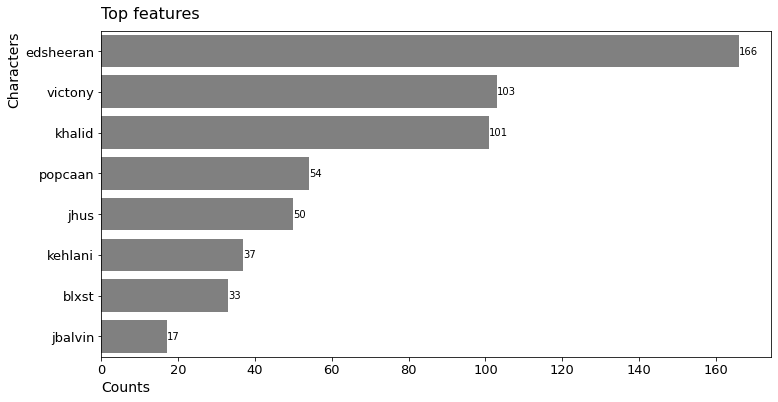

In [72]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Count', y='b_Characters', data=b_character_count_df, color = 'gray')
    
plt.bar_label(ax.containers[0])
ax.set_title('Top features', fontdict={'fontsize':16}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc= 'left')
ax.set_ylabel('Characters', fontdict={'fontsize':14}, loc = 'top')
#The most talked about featured artist is ed sheeran

# Top retweeted and Liked Tweets

In [183]:
#create a dataframe for top retweeted & liked tweets
top_retweets = tweets_df.sort_values(by='Retweets',ascending=False).head(20)
top_likes = tweets_df.sort_values(by='Likes',ascending=False).head(20)
top_retweets

,id,Datetime,Tweet Id,Text,Username,Location,Language,Retweets,Likes,Hashtags,MentionedUsers,Characters,b_Characters,c_Characters,ProcessedText
5633,5633,2022-07-11 23:57:45+00:00,1546644947608240128,The name ‘Burna Boy’ should be changed to ‘Bur...,LabanElisha23,,en,3009,28116,#lovedamini,,,,burna ’ burna ’ burna ’ album lovedamini,The name ‘Burna Boy’ should be changed to ‘Bur...
8765,8765,2022-07-10 21:52:55+00:00,1546251143566819330,"Well, #LOVEDAMINI https://t.co/34gUoYOsto 😘 h...",burnaboy,OUTSIDE,en,2536,25419,#lovedamini,,,,", lovedamini","Well, #LOVEDAMINI 😘"
11263,11263,2022-07-10 09:38:13+00:00,1546066249372913664,Congrats @burnaboy on another huge one. Last L...,timayatimaya,,en,2230,22689,#lovedamini,@burnaboy,,,congrats burnaboy another lovedamini,Congrats @burnaboy on another huge one. Last L...
14305,14305,2022-07-09 16:25:36+00:00,1545806383806906369,#Vanilla visual story out now ft. #RayBanStori...,burnaboy,OUTSIDE,en,1604,6557,#vanilla #raybanstories #sponsored #lovedamini,@ray_ban,vanilla,,lovedamini,#Vanilla visual story out now ft. #RayBanStori...
15936,15936,2022-07-09 10:52:51+00:00,1545722643575439367,Omo this burna album na 10000/100🔥🔥🔥♥️♥️\n#lov...,HarjoRoseline,"New York, USA",en,1594,23080,#lovedamini,@burnaboy,,,burna album lovedamini burnaboy,Omo this burna album na 10000/100🔥🔥🔥♥️♥️\n#lov...
1120,1120,2022-07-14 07:52:56+00:00,1547489307757256704,We’re still on it 🇬🇧🇬🇧 go purchase the album o...,burnaboy,OUTSIDE,en,1255,7788,#lovedamini4no1 #lovedamini,,,,’ album lovedamini,We’re still on it 🇬🇧🇬🇧 go purchase the album o...
5565,5565,2022-07-12 00:50:37+00:00,1546658251395284992,Hardwork really pays! Destiny can only be dela...,bmspacestore,Worldwide,en,1204,15274,#lovedamini,,,,"burna lovedamini ,",Hardwork really pays! Destiny can only be dela...
14917,14917,2022-07-09 14:25:14+00:00,1545776095454269442,Let’s go Birmingham! 🎉 #LOVEDAMINI https://t.c...,burnaboy,OUTSIDE,en,1199,10954,#lovedamini,,,,’ lovedamini,Let’s go Birmingham! 🎉 #LOVEDAMINI
7562,7562,2022-07-11 10:16:11+00:00,1546438192185876482,"Before I announced, working on a second :) #LO...",burnaboy,OUTSIDE,en,1198,9074,#lovedamini,,,,", lovedamini","Before I announced, working on a second :) #LO..."
13811,13811,2022-07-09 18:04:40+00:00,1545831316264042497,Burna Boy never disappoints! I love every bit ...,itskenechi,United States,en,1134,14795,#lovedamini,,,,burna love album lovedamini,Burna Boy never disappoints! I love every bit ...


Text(0, 1, 'Users')

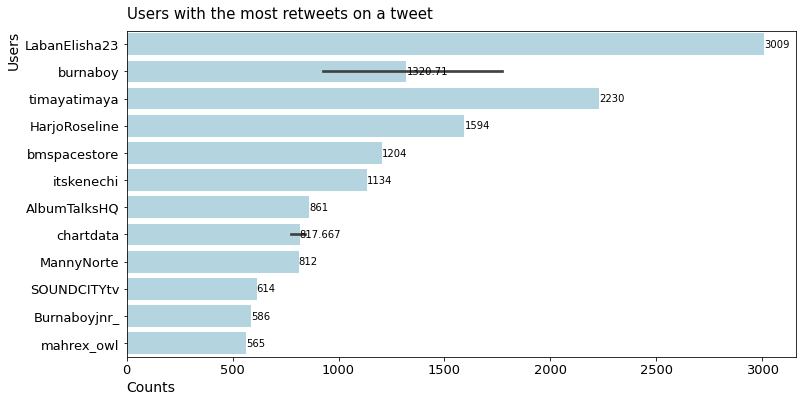

In [184]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Retweets', y='Username', data = top_retweets.head(20), color='lightblue')
    
plt.bar_label(ax.containers[0])
ax.set_title('Users with the most retweets on a tweet', fontdict={'fontsize':15}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc='left')
ax.set_ylabel('Users', fontdict={'fontsize':14}, loc='top')

# The handle @LabanElisha23 has the most retweets on a single tweet
#The handle @burnaboy has an otliner & this is because he made a series of tweets that had a lot of retweets

Text(0, 1, 'Users')

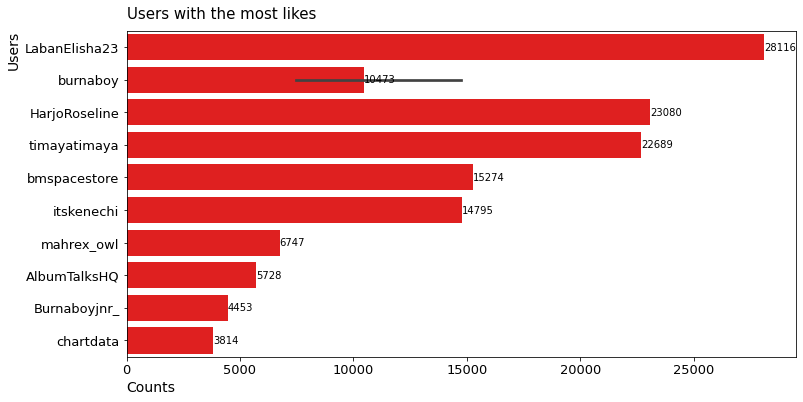

In [171]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Likes', y='Username', data = top_likes.head(20), color='red')
    
plt.bar_label(ax.containers[0])
ax.set_title('Users with the most likes ', fontdict={'fontsize':15}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc='left')
ax.set_ylabel('Users', fontdict={'fontsize':14}, loc='top')

# The handle @LabanElisha23 has the most likes on a single tweet
#The handle @burnaboy has an outliner & this is because he made a series of tweets that had a lot of likes

# Most Tagged/Mentioned tweeter User

In [327]:
mentions_count_df, mentions_string = count('MentionedUsers')

Text(0, 1, 'Users')

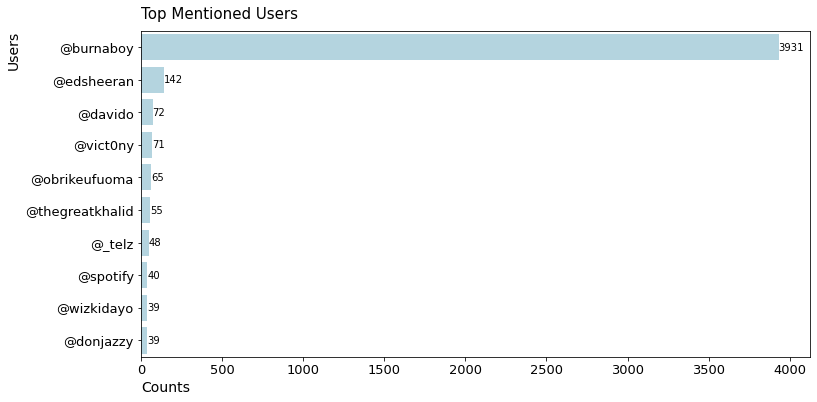

In [74]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Count', y='MentionedUsers', data = mentions_count_df.head(10), color='lightblue')
    
plt.bar_label(ax.containers[0])
ax.set_title('Top Mentioned Users', fontdict={'fontsize':15}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc='left')
ax.set_ylabel('Users', fontdict={'fontsize':14}, loc='top')

#looking at the chart we can see that @burnaboy was the Most Tagged/Mentioned tweeter User,
#Coming in 2nd is @edsheeran who is an artiste featured on the album

# Top Tweeters

In [178]:
User_count_df, User_string = count('Username')
User_count_df.head(10)
#These are the users who made the higgest amount of tweets using the #lovedamini hashtag, 
#within the 1st week of the album being released

,Username,Count
0,Burnaboystats1,181
1,AaronxMikee,148
2,olasijiayo,117
3,EdegheF,67
4,Miss_Slovex,66
5,bridgeradio987,65
6,UnrulyOutsider,56
7,bmspacestore,43
8,ArewaAdebukolaa,42
9,burnaOutsiders,35


# Location

In [324]:
Loc_count_df, Loc_string = count('Location')


Text(0, 1, 'Users')

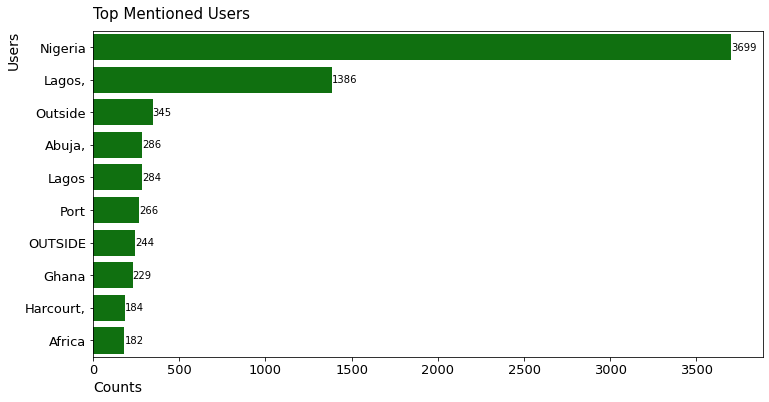

In [177]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Count', y='Location', data = Loc_count_df.head(10), color='green')
    
plt.bar_label(ax.containers[0])
ax.set_title('Top Mentioned Users', fontdict={'fontsize':15}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc='left')
ax.set_ylabel('Users', fontdict={'fontsize':14}, loc='top')
#Most of the tweets where mad from Nigeria 
#Also 'Lagos', Abuja & port harcourt are states & cities in Nigeria

# . Common words used

In [325]:
c_character_count_df, c_character_string = count('c_Characters')

Text(0, 1, 'Users')

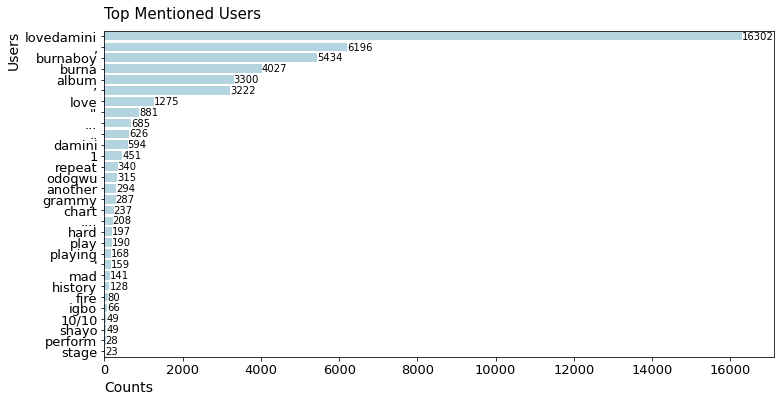

In [100]:
with plt.rc_context({'font.size':13}):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Count', y='c_Characters', data = c_character_count_df.head(30), color='lightblue')
    
plt.bar_label(ax.containers[0])
ax.set_title('Top Mentioned Users', fontdict={'fontsize':15}, loc='left', pad=12)
ax.set_xlabel('Counts', fontdict={'fontsize':14}, loc='left')
ax.set_ylabel('Users', fontdict={'fontsize':14}, loc='top')
#These are the top words used in the tweets

#top words

In [187]:
nltk_stopwords = list(stopwords.words('english'))
common_words = ['burnaboy','burna', 'last last', 'a boat','shy hoe','mad', 'shayo', 'igbo','10/10', 'album', 'lovedamini', 'gun', 
                'another', 'hard','af', 'june', '8th','album','love','damini','fire','congrats','congratulations','african giant', 
               'best album','grammy' ,'chart','odogwu','perform', 'play','playing','stage','perfomance','no cap','too good',"'", '...', '....', 
                '1','#1','history','repeat','blood', 'trash', 'week'
               "''", '..', ',', '’']

stop_words = nltk_stopwords + common_words + burna_songs + burna_features #inlcuding coomon words and characters into stopwords

word_count = []
tweet = tweets_df['Text'].tolist()
for word in tweet:
    word = word.lower()
    word = re.sub(r'http\S+|www\S+', '', word, flags = re.MULTILINE) #removing links
    word = re.sub(r'@\S+|#\S+', '', word, flags = re.MULTILINE) #removing mentioned users and hashtgas
    word = emoji.demojize(word)
    word = re.sub(r':\w+:', '', word, flags = re.MULTILINE) #removing emojis
    
    word_tokens = word_tokenize(word)
    tokenized_word = [word for word in word_tokens if word not in stop_words] #removing stopwords
    cleaned_word = [word for word in tokenized_word if word not in string.punctuation] #remoivng punctuations
    lemma = WordNetLemmatizer()
    root_word = [lemma.lemmatize(word) for word in cleaned_word] #using lemmatizer to find the root word of words
    word_count.append(root_word)
    
word_string = '-'.join(item for word in word_count for item in word)

In [188]:
#Creating the top words dataframe
word_counter = Counter(word_string.split("-"))
word_count_df = pd.DataFrame.from_dict(word_counter, orient='index').reset_index()
word_count_df.columns = ['Word', 'Count']
word_count_df.sort_values('Count', ascending=False, inplace=True)
word_count_df.reset_index(inplace=True, drop='True')

word_count_df.head(10)

,Word,Count
0,boy,2558
1,song,1867
2,'s,1641
3,dey,1572
4,last,1231
5,person,1090
6,common,1025
7,go,1022
8,like,990
9,n't,950


Text(0.5, 1.0, 'Burna boy Top Words')

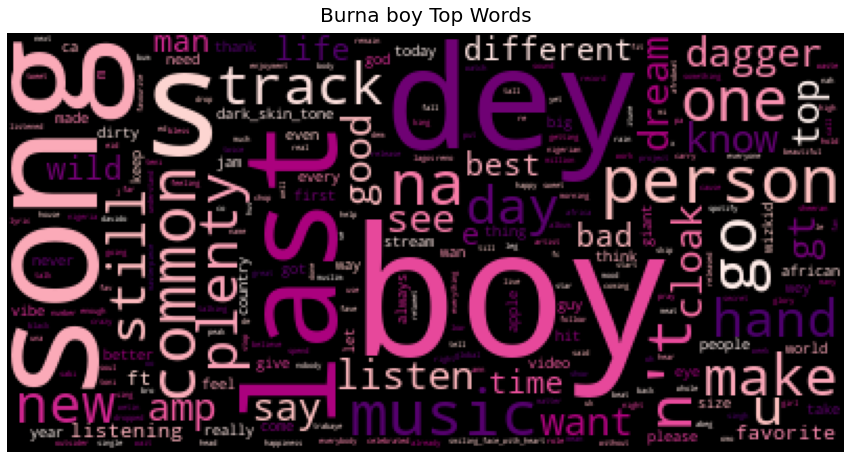

In [189]:
word_wc = WordCloud(background_color='black', max_words=250, collocations=False)

#Generate the word cloud
word_wc.generate(word_string)

#Display the word cloud
fig = plt.figure(figsize=(15, 16))
plt.imshow(word_wc.recolor(colormap='RdPu'), alpha=1)
plt.axis('off')
plt.title('Burna boy Top Words', fontdict={'fontsize':20}, pad=12)

# Sentiment Analysis using Vader, TextBlob using PatternAnalyzer and TextBlob using NaiveBayesAnalyzer

In [101]:
#Function to remove links from tweets
def processingTweet(tweet):
    tweet = re.sub(r'http\S+|www\S+', '', tweet, flags = re.MULTILINE)
    return tweet

In [102]:
#using the funtion to remove links from tweets in the "Text" column and putting the clened tweets in a new column called "ProcessedText"
tweets_df.loc[:, 'ProcessedText'] = tweets_df.loc[:,'Text'].apply(processingTweet)

C:\Users\Uche Chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [123]:
tweets_df.tail()

,id,Datetime,Tweet Id,Text,Username,Location,Language,Retweets,Likes,Hashtags,MentionedUsers,Characters,b_Characters,c_Characters,ProcessedText
16141,16141,2022-07-09 10:20:52+00:00,1545714595582693376,This run🔥🏆\nPS: Messi is Solid \n#LoveDamini h...,nwobodonobert,Nigeria,en,14,29,#lovedamini,,solid,,lovedamini,This run🔥🏆\nPS: Messi is Solid \n#LoveDamini
16142,16142,2022-07-09 10:20:44+00:00,1545714561860386817,I still can’t relate to how people pick their ...,killarboi_,Mars,en,0,0,#lovedamini,,,,’ ... album hard lovedamini,I still can’t relate to how people pick their ...
16143,16143,2022-07-09 10:20:22+00:00,1545714471062192129,Can we talk about common person #lovedamini ht...,ChanelKokolo,Paris,en,0,0,#lovedamini,,,,lovedamini,Can we talk about common person #lovedamini
16144,16144,2022-07-09 10:19:54+00:00,1545714353793556482,#LoveDamini is a very good album. Love the vib...,Dami1190,,en,0,0,#lovedamini,@burnaboy,,,lovedamini album love burnaboy,#LoveDamini is a very good album. Love the vib...
16145,16145,2022-07-09 10:19:49+00:00,1545714334537482241,For my hand&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt...,MaxiClothing,,en,0,1,#burnaboy𓃵 #africangiant #lovedamini #afrobeat...,@burnaboy,,,burnaboy .... lovedamini,For my hand&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt...


In [106]:
tweets_df = tweets_df.reset_index().rename(columns={'index':'id'}) #making the "id" column the index

In [108]:
#Performing sentiment analysis on the processed tweets
res = {}

for i, row in tqdm(tweets_df.iterrows(), total=len(tweets_df)):
    text = row['ProcessedText']
    myid = row['id']
   
    vader_result = sia.polarity_scores(text)['compound']
    if vader_result >= 0.05:
        vader_sentiment = 'pos'
    elif vader_result <= -0.05:
        vader_sentiment = 'neg'
    else:
        vader_sentiment = 'neu'
        
    text_blob = TextBlob(text).sentiment.polarity
    if text_blob >= 0:
        blob_sentiment = 'pos'
    elif text_blob == 0:
        blob_sentiment = 'neu'
    else:
        blob_sentiment = 'neg'
    
    text_blob_nav = TextBlob(text, analyzer=nav_bayes).sentiment.classification
    blob_subject = TextBlob(text).sentiment.subjectivity
    
    sentiments = [vader_result, vader_sentiment, text_blob, blob_sentiment, text_blob_nav, blob_subject]
    res[myid] = sentiments

  0%|          | 0/16146 [00:00<?, ?it/s]

In [110]:
#Converting the result into a dataframe
sentiment_df = pd.DataFrame.from_dict(res, orient='index').rename(
    columns={0: 'vader_score', 1:'vader_sentiment', 2:'text_blob',3: 'blob_sentiment', 
             4: 'text_blob_naivebayes', 5:'subjectivity'})

sentiment_df = sentiment_df.reset_index().rename(columns={'index':'id'})
sentiment_df.tail(10)

,id,vader_score,vader_sentiment,text_blob,blob_sentiment,text_blob_naivebayes,subjectivity
16136,16136,0.5267,pos,0.500000,pos,neg,0.600000
16137,16137,-0.8957,neg,-0.462500,neg,pos,0.750000
16138,16138,0.0000,neu,0.000000,pos,pos,0.000000
16139,16139,-0.9042,neg,0.062500,pos,pos,0.375000
16140,16140,0.6249,pos,0.000000,pos,pos,0.100000
16141,16141,-0.2023,neg,0.000000,pos,pos,0.100000
16142,16142,-0.0171,neu,0.104167,pos,pos,0.520833
16143,16143,0.0000,neu,-0.300000,neg,pos,0.500000
16144,16144,0.8251,pos,0.705000,pos,pos,0.690000
16145,16145,0.5229,pos,0.175000,pos,pos,0.575000


In [111]:
#Combining the sentiment dataframe with the tweets dataframe
combined_df = tweets_df.merge(sentiment_df)

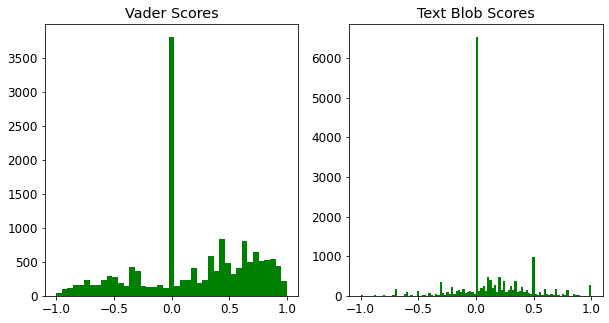

In [112]:
with plt.rc_context({'font.size': 12}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax = ax1.hist(combined_df['vader_score'], bins='fd', color='g')
    axe2 = ax2.hist(combined_df['text_blob'], bins='fd', color='g')

    ax1.set_title('Vader Scores')
    ax2.set_title('Text Blob Scores')

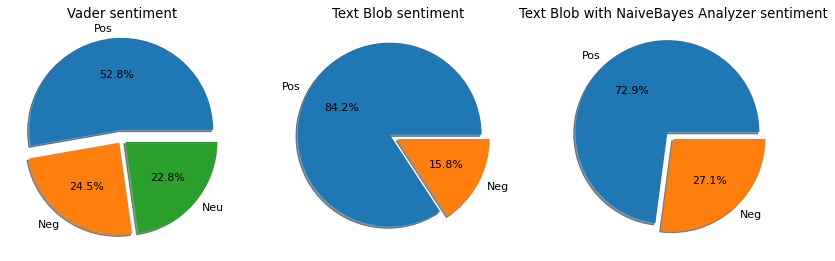

In [113]:
with plt.rc_context({'font.size': 11}):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 13))
    ax = ax1.pie(combined_df['vader_sentiment'].value_counts(), explode=[.1, 0.05, 0.05], labels=['Pos', 'Neg', 'Neu'], 
           autopct='%1.1f%%', shadow=True)
    axe2 = ax2.pie(combined_df['blob_sentiment'].value_counts(), explode=[.1, 0], labels=['Pos', 'Neg'], 
           autopct='%1.1f%%', shadow=True)
    axe3 = ax3.pie(combined_df['text_blob_naivebayes'].value_counts(), explode=[.1, 0], labels=['Pos', 'Neg'], 
           autopct='%1.1f%%', shadow=True)

    ax1.set_title('Vader sentiment')
    ax2.set_title('Text Blob sentiment')
    ax3.set_title('Text Blob with NaiveBayes Analyzer sentiment')

According to the analysis more than half of the tweets are positive
This would lead me to belive that in the first week of Burna boys Album droping, the tweeter community loves it

In [186]:
#Storing and saving to csv files
#location_data.iloc[:, [0, 3, 4, 2]].to_csv('location.csv')
combined_df.to_csv('sentiments.csv')
hash_count_df[hash_count_df['Count'] > 20].to_csv('hashtags.csv')
character_count_df.to_csv('character.csv')
mentions_count_df[mentions_count_df['Count'] > 10].to_csv('mentioned_users.csv')